Step 1 : Set up the environment with data set and directory structure.
         Set the magic function of Jupyter notebook

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#directory structure can be checked from Jupyter notebook using dir command and a raw string input
!dir {r'celeb\train'}

 Volume in drive C is Windows
 Volume Serial Number is A60D-61E1

 Directory of C:\Users\conne\Documents\Data Science\Profile\Git\CNN\CelebNameGuess\celeb\train

09/03/2018  07:05 PM    <DIR>          .
09/03/2018  07:05 PM    <DIR>          ..
09/03/2018  07:05 PM    <DIR>          ariel-winter
09/03/2018  07:00 PM        84,606,928 first_try.h5
09/03/2018  07:05 PM    <DIR>          jennifer-lawrence
09/03/2018  07:05 PM    <DIR>          kaley-cuoco
               1 File(s)     84,606,928 bytes
               5 Dir(s)  130,897,092,608 bytes free


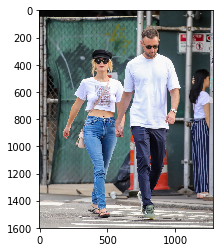

In [6]:
#If you want to check that the images are accessible through Jupyter notebook use the below commands
import matplotlib.pyplot as plt
img = plt.imread(r'celeb\train\jennifer-lawrence\j (129).jpg')
plt.imshow(img)

In [11]:
#The shape of the image shows the redular pixel dimension and color channels
img.shape

(1600, 1280, 3)

Step 2: Importing the required library using following markdown cells. This steps needs to be taken care of since, any error at this point will not let you proceed. Care must be taken while setting up tensorflow backend and Keras. Also if Nvidia graphics card is to be used then then do install required set of libraries and drivers update from the website 

In [2]:
from __future__ import print_function, division
import numpy as np
import random
import os
import glob
import cv2
import datetime
import pandas as pd
import time
import h5py
import csv
from scipy.misc import imresize, imsave
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.utils import shuffle
from PIL import Image, ImageChops, ImageOps
import matplotlib.pyplot as plt
from keras import backend as K
from keras.callbacks import EarlyStopping, Callback
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import optimizers
from keras.models import Sequential, model_from_json
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, Activation, Dropout, Flatten, Dense


C:\Users\conne\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import keras



Step 3: once the libraries are imported. setup the training and validation dataset using ImageDataGenerator

In [26]:

# use ImageDataGenerator to preprocess the data
from keras.preprocessing.image import ImageDataGenerator

# augment the data that we have
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

# prepare training data
training_data = train_datagen.flow_from_directory(r'celeb\train', target_size = (224, 224),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

# prepare test data
test_data = test_datagen.flow_from_directory(r'celeb\valid',
                                            target_size = (224, 224),
                                            batch_size = 20,
                                            class_mode = 'categorical')


Found 1302 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


Step 4: Building the required model. In this case VGG16 is the base model which is added to a top model that is trained by our dataset

In [29]:
from keras import applications
from keras.models import Sequential, Model

img_width, img_height = 224, 224
nb_train_samples = 1302
nb_validation_samples = 150
epochs = 5
batch_size = 20

model = applications.VGG16(weights='imagenet', include_top=False , input_shape=(224,224,3))
print('Model loaded.')

top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu',name='newlayer'))
top_model.add(Dropout(0.5))
top_model.add(Dense(3, activation='softmax'))

model = Model(inputs= model.input, outputs= top_model(model.output))


for layer in model.layers[:19]:
    layer.trainable = False


model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])


Model loaded.


In [30]:
model.fit_generator(
    training_data,
    steps_per_epoch=nb_train_samples// batch_size,
    epochs=epochs,
    validation_data=test_data,
    validation_steps=nb_validation_samples)

Epoch 1/5
65/65 [==============================] - 253s 4s/step - loss: 1.0849 - acc: 0.4754 - val_loss: 0.7594 - val_acc: 0.7131
Epoch 2/5
65/65 [==============================] - 253s 4s/step - loss: 0.8032 - acc: 0.6423 - val_loss: 0.6141 - val_acc: 0.7546
Epoch 3/5
65/65 [==============================] - 238s 4s/step - loss: 0.7023 - acc: 0.6947 - val_loss: 0.5814 - val_acc: 0.7798
Epoch 4/5
65/65 [==============================] - 200s 3s/step - loss: 0.5774 - acc: 0.7738 - val_loss: 0.5284 - val_acc: 0.8064
Epoch 5/5
65/65 [==============================] - 198s 3s/step - loss: 0.5505 - acc: 0.7731 - val_loss: 0.5231 - val_acc: 0.8007


In [31]:
model.save_weights('first_try.h5')

Step 5:Testing the model on the test dataset forms the next step of the flow

6.5119067e-34##1.3198554e-09##1.0
2.3839657e-33##0.99893636##0.0010637013
0.0##0.0##1.0
0.0##0.0008260868##0.99917394
6.9714735e-28##0.99999976##1.9737806e-07
1.1824914e-26##0.0##1.0
1.0##0.0##7.610881e-23
7.491947e-29##0.0##1.0


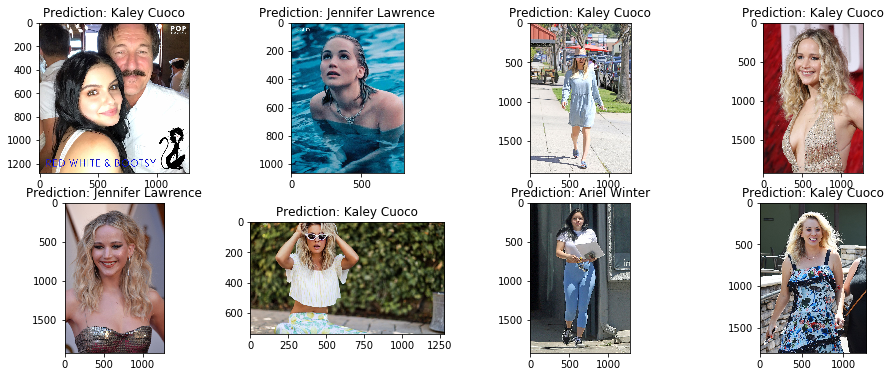

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

w=10
h=10
fig=plt.figure(figsize=(16, 16))
columns = 4
rows = 5
ran=np.random.randint(low=1, high=60, size=9)
shown = []

for i in range(1, len(ran)):
    k=ran[i]
    labelString = f"celeb/test/1 ({k}).jpg"
    shown.append(f"celeb/test/1 ({k}).jpg")
    img=mpimg.imread(f"celeb/test/1 ({k}).jpg")
    subp=fig.add_subplot(rows, columns, i)
    subp.set_title(predict(labelString))
    plt.imshow(img)
    
plt.show()

#Below is the helper function that is meant to test the modeland generate predictions

In [32]:
# to make predictions
import numpy as np
def predict(imagesToPredict):
    from keras.preprocessing import image
    test_image = image.load_img(imagesToPredict, target_size = (224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    prediction =""
    print(str(result[0][0] ) +'##' + str(result[0][1] ) +'##' + str( result[0][2] ))
    if result[0][0] > 0.8:
        prediction = 'Ariel Winter'
    elif(result[0][1] > 0.8):
        prediction = 'Jennifer Lawrence'
    elif(result[0][2] > 0.8):
        prediction = 'Kaley Cuoco'
        
    return ('Prediction: '+ prediction)